In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import random
import operator
import copy
import math
import itertools
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
class Particle:

    def __init__(self):
        self.position = self.random_vector(100)
        self.pbest =  self.position.copy()
        self.velocity = self.random_vector(2)
        
        self.best_cost = self.get_cost(self.pbest)
        self.current_cost = self.get_cost(self.position)
    
    def random_vector(self, num):
        x = random.random()*num
        y = random.random()*num
        return [x,y]
    
    def update_vel_and_pos(self):
        #Coefficients
        i = 0.1
        j1 = 0.5
        j2 = 0.5
        #Properties
        vel = self.velocity.copy()
        pos =  self.position.copy()
        pb = self.pbest.copy()
        gb = g_best.copy()
        #Uniform random vectors
        rand_1 = self.random_vector(1)
        rand_2 = self.random_vector(1)
        #Calculations
        vel1 = [vel[x]*i for x in range(len(vel))]
        pb1 = [((a - b)*c*j1) for a, b, c in zip(pb, pos, rand_1)]
        gb1 = [((a - b)*c*j2) for a, b, c in zip(gb, pos, rand_2)]
        self.velocity = [(a+b+c) for a, b, c in zip(vel1 ,pb1, gb1)]
        self.position = [(a+b) for a, b in zip(self.position,self.velocity)]  
        self.update_pb()
    
    def update_pb(self):
        self.current_cost = self.get_cost(self.position)
        
        if self.current_cost < self.best_cost:
            self.pbest = self.position.copy()
            self.best_cost = self.current_cost
    
    def get_cost(self, pos):
        costs = []
        for i in range(len(opt_pos)):
            x = pow(pos[0]-opt_pos[i][0],2)
            y = pow(pos[1]-opt_pos[i][1],2)
            cost = math.sqrt(x+y)+opt_pos[i][2]
            costs.append(cost)
        return min(costs)     
            

In [10]:
def PSO():

    global g_best
    global g_cost
    global opt_pos
    
    #Opimal posiition
    opt_pos = []
    #Append each optimal position, [x-pos, y-pos, value], a lower value makes the position more attractable
    opt_pos.append([90.0, 90.0, 0])
    
    g_best = [0.0, 0.0]
    g_cost = 1000
    population = []
    positions = []
    #Population size
    size = 20
    #Number of iterations
    loops = 50
    
    #Initlise the particles
    for x in range(size):
        population.append(Particle())
        
    for x in range(loops):
        #Record position of particles for each iteration
        positions.append([])
        for i in range(size):
            positions[x].append(population[i].position)
            
        #Set Global best
        for i in range(size):
            cost = population[i].best_cost
            if cost < g_cost:
                g_best = population[i].pbest
                g_cost = cost
                
        #Set new velocity and pos
        for i in range(size):
            population[i].update_vel_and_pos()

    #return the positions, populations, global best and, cost
    return positions, population, g_best, g_cost

In [11]:
positions, population, g_best, g_cost = PSO()

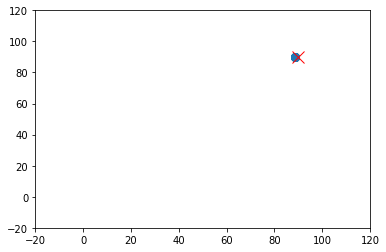

In [15]:
fig = plt.figure(1)
ax = plt.axes(xlim=(-20, 120), ylim=(-20, 120))
scat = ax.scatter([], [], s=60)
plt.plot(90.0, 90.0, marker="x", c="red", markersize=12)
def init():
    scat.set_offsets([])
    return scat,

def animate(i):
    data = positions[i]
    scat.set_offsets(data)
    return scat,

anim = FuncAnimation(fig, animate, init_func=init, frames=len(positions)-2, 
                               interval=150, blit=False, repeat=False)
HTML(anim.to_jshtml())

In [16]:
print("Best position: "+str(g_best))

Best position: [88.50889236162094, 90.1685508669154]
